In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install joypy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import json

f = open('rankings.json', 'r')

original_data = json.load(f)
f.close()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [4]:

import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted

data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  font = str(i+1).zfill(2) + '. ' + d['font']
  for j in range(n):
    data.append([font, values[j]])
  
df = pd.DataFrame(data, columns=['Font', 'Value'])
print(df)

                   Font      Value
0       01. Baskerville  25.010504
1       01. Baskerville  25.922081
2       01. Baskerville  26.094181
3       01. Baskerville  25.980832
4       01. Baskerville  24.309366
5       01. Baskerville  25.605833
6       01. Baskerville  25.179828
7       01. Baskerville  25.435766
8       01. Baskerville  25.620834
9       01. Baskerville  25.720377
10      01. Baskerville  23.542915
11      01. Baskerville  24.673182
12      01. Baskerville  26.520401
13      01. Baskerville  26.587409
14      01. Baskerville  25.175293
15      01. Baskerville  25.744456
16      01. Baskerville  25.375556
17      01. Baskerville  26.186266
18      01. Baskerville  25.672607
19      01. Baskerville  25.562756
20      01. Baskerville  24.686070
21      01. Baskerville  24.496545
22      01. Baskerville  26.107382
23      01. Baskerville  26.559130
24      01. Baskerville  25.892798
25      01. Baskerville  26.272029
26      01. Baskerville  24.922724
27      01. Baskervi

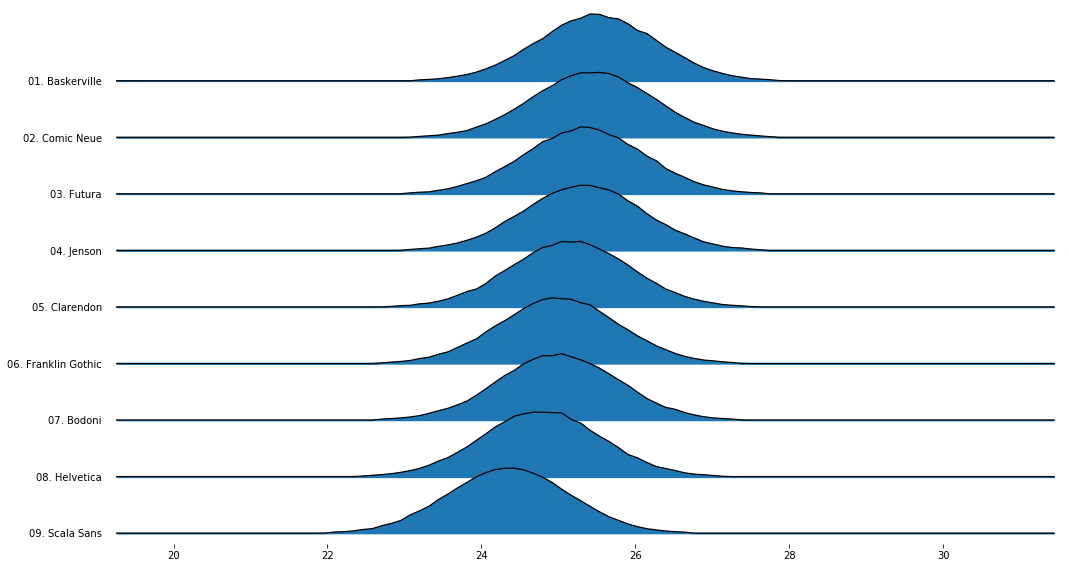

In [6]:
%matplotlib inline

from matplotlib import cm

fig, axes = joypy.joyplot(df, by="Font", 
                          grid=False, linewidth=1.25, x_range=[19.2,31.5],
                          legend=False, overlap=0.5, figsize=(15,8), kind="counts", bins=100)

fig.savefig("rank_general.svg")
